In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [185]:
#Read data
data = pd.read_excel('/Users/dr/Documents/GitHub/KMeans and KNN/-Stock-classification-with-K-means-and-KNN-1/RTY as of Oct 25 20241_rrmkcreo.xlsx', engine='openpyxl')

In [186]:
data.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,--,--,23.480,1.219984,2754470912,29.274418,35.469791,354.21405,--,51.98077,--,--,183.01,--,33.822326
1,AXNX UW Equity,Axonics Inc,--,--,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,--,25.707512,--,--,175.53,--,109.80486
2,WGS UW Equity,GeneDx Holdings Corp,--,--,60.250,--,703855680,1.196106,0.803663,--,--,--,--,--,148.00,--,--
3,ULCC UW Equity,Frontier Group Holdings Inc,--,--,6.985,--,1106645376,2.805808,0.402562,8.841541,--,--,--,54.347534,126.26,--,15.980725
4,RELY UW Equity,Remitly Global Inc,--,--,14.640,2.77041,3659426304,--,--,--,--,--,--,--,98.00,--,59.219034


In [187]:
data.columns

Index(['Ticker', 'Name', 'Weight', 'Shares', 'Price', 'BEst PEG Ratio:Y\n',
       'Market Cap LF\n', 'P/B 5Yr Avg LF\n', 'P/S 5Yr Avg LF\n',
       'Rev Gr Adj 5Y CAGR LF\n', 'P/CF 5Yr Avg LF\n', 'BV - 5 Yr Geo Gr LF\n',
       'CF/Sh - 5 Yr Geo Gr LF\n', 'Basic EPS - 5 Year Average Growth LF\n',
       'BEst Est LTG EPS\n', 'Dvd Ind Yld\n', 'BEst P/E BF12M\n'],
      dtype='object')

In [188]:
data.shape

(1972, 17)

In [189]:
#Replace the string '--' with median
data_replaced = data.replace('--', np.nan)

numeric_columns = data_replaced.columns.drop(['Ticker', 'Name'])

data_replaced[numeric_columns] = data_replaced[numeric_columns].apply(pd.to_numeric, errors='coerce')
data_replaced[numeric_columns] = data_replaced[numeric_columns].fillna(data_replaced[numeric_columns].median())


/var/folders/p2/s867_82x1zb758ysgxvlj2yw0000gn/T/ipykernel_5794/4270914025.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_replaced = data.replace('--', np.nan)


In [190]:
data_replaced.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,NaN,NaN,23.480,1.219984,2.754471e+09,29.274418,35.469791,354.214050,9.402755,51.980770,5.339077,11.328490,183.01,2.786486,33.822326
1,AXNX UW Equity,Axonics Inc,NaN,NaN,70.140,3.109805,3.429709e+09,4.959128,8.200708,138.390976,9.402755,25.707512,5.339077,11.328490,175.53,2.786486,109.804860
2,WGS UW Equity,GeneDx Holdings Corp,NaN,NaN,60.250,1.501337,7.038557e+08,1.196106,0.803663,6.413981,9.402755,4.885082,5.339077,11.328490,148.00,2.786486,14.951520
3,ULCC UW Equity,Frontier Group Holdings Inc,NaN,NaN,6.985,1.501337,1.106645e+09,2.805808,0.402562,8.841541,9.402755,4.885082,5.339077,54.347534,126.26,2.786486,15.980725
4,RELY UW Equity,Remitly Global Inc,NaN,NaN,14.640,2.770410,3.659426e+09,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,98.00,2.786486,59.219034


In [191]:
X = data_replaced[['BEst PEG Ratio:Y\n', 'Market Cap LF\n']]

In [192]:
X.head()

,BEst PEG Ratio:Y\n,Market Cap LF\n
0,1.219984,2.754471e+09
1,3.109805,3.429709e+09
2,1.501337,7.038557e+08
3,1.501337,1.106645e+09
4,2.770410,3.659426e+09


In [193]:
#Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [194]:
X_scaled

array([[-0.07251496,  0.71845625],
       [ 0.11792153,  1.11895995],
       [-0.04416308, -0.49782424],
       ...,
       [-0.04416308,  0.22962139],
       [-0.04416308, -0.516583  ],
       [-0.04416308,  0.82883977]])

In [195]:
df = pd.DataFrame(X_scaled, columns=['BEst PEG Ratio:Y\n', 'Market Cap LF\n'])

In [196]:
df

,BEst PEG Ratio:Y\n,Market Cap LF\n
0,-0.072515,0.718456
1,0.117922,1.118960
2,-0.044163,-0.497824
3,-0.044163,-0.258918
4,0.083721,1.255212
...,...,...
1967,-0.228686,-0.373590
1968,-0.044163,2.282367
1969,-0.044163,0.229621
1970,-0.044163,-0.516583


In [197]:
#K-means Clustering
n_clusters = 9
kmeans = KMeans(n_clusters, random_state=42)
kmeans.fit_predict(df)

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

In [198]:
clusters

array([0, 5, 3, ..., 0, 3, 5], dtype=int32)

In [199]:
df['Cluster'] = clusters
data_replaced['Cluster'] = clusters

# X_updated = np.column_stack((X_scaled, clusters))

In [200]:
df.head()

,BEst PEG Ratio:Y\n,Market Cap LF\n,Cluster
0,-0.072515,0.718456,0
1,0.117922,1.118960,5
2,-0.044163,-0.497824,3
3,-0.044163,-0.258918,3
4,0.083721,1.255212,5


In [201]:
centroids

array([[-2.38230281e-02,  2.30491635e-01],
       [ 4.26414287e-02,  2.85025563e+00],
       [ 2.66175062e+01,  6.55491672e-01],
       [-5.55048299e-02, -6.06272704e-01],
       [ 9.19666999e+00,  4.19959073e-01],
       [-2.46616183e-02,  1.30349913e+00],
       [ 1.69374027e+01,  9.12029028e-01],
       [-9.76727327e+00,  8.48790941e-01],
       [-9.93087173e-02,  1.15673077e+01]])

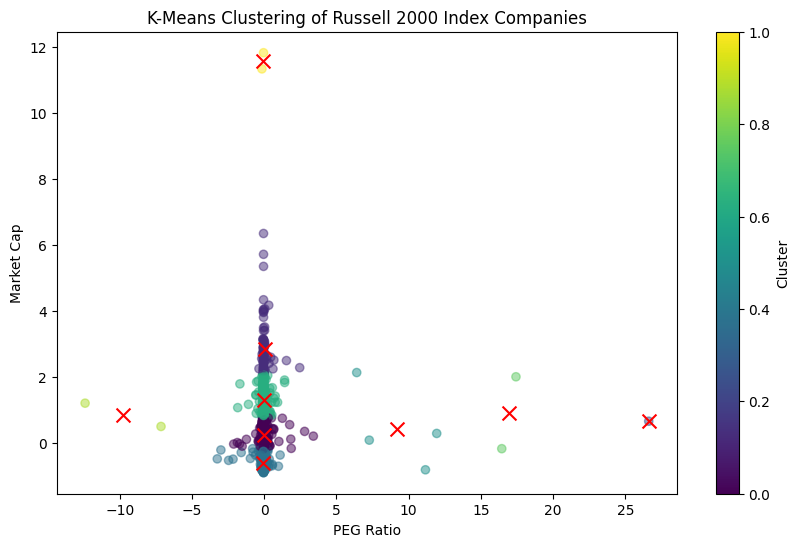

In [202]:
#Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(df['BEst PEG Ratio:Y\n'], df['Market Cap LF\n'], c=df['Cluster'], cmap='viridis', alpha=0.5)
# plt.scatter(X_updated[:, 0], X_updated[:, 1], c=X_updated[:, 2], cmap='viridis', alpha=0.5)

#Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.xlabel('PEG Ratio')
plt.ylabel('Market Cap')
plt.title('K-Means Clustering of Russell 2000 Index Companies')
plt.colorbar(label='Cluster')
plt.show()



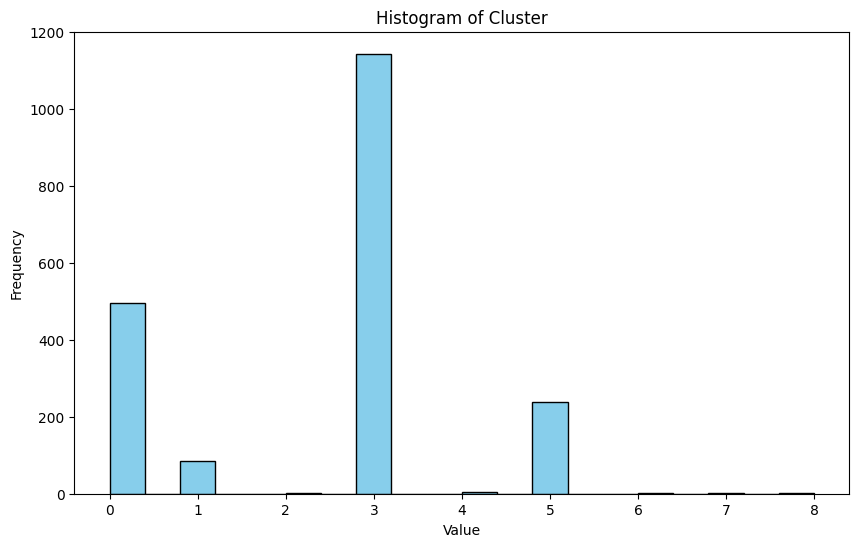

         Market Cap LF\n  BEst PEG Ratio:Y\n
Cluster                                     
0               0.230492           -0.023823
1               2.850256            0.042641
2               0.655492           26.617506
3              -0.606273           -0.055505
4               0.419959            9.196670
5               1.303499           -0.024662
6               0.912029           16.937403
7               0.848791           -9.767273
8              11.567308           -0.099309


In [203]:
#Histogram of clusters
plt.figure(figsize=(10, 6))
plt.hist(df['Cluster'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster')
plt.show()

result = df.groupby('Cluster')[['Market Cap LF\n', 'BEst PEG Ratio:Y\n']].mean()
print(result)

In [204]:
#MorngingStar Style Box

data_replaced['Value Score'] = (
                                data_replaced['BEst P/E BF12M\n'] * 0.50 + 
                                data_replaced['P/B 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['P/S 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['P/CF 5Yr Avg LF\n'] * 0.125 + 
                                data_replaced['Dvd Ind Yld\n'] * 0.125
                                )

data_replaced['Growth Score'] = (data_replaced['BEst Est LTG EPS\n'] * 0.50 + 
                                 data_replaced['Basic EPS - 5 Year Average Growth LF\n'] * 0.125 + 
                                 data_replaced['Rev Gr Adj 5Y CAGR LF\n'] * 0.125 +
                                 data_replaced['CF/Sh - 5 Yr Geo Gr LF\n'] * 0.125 +
                                 data_replaced['BV - 5 Yr Geo Gr LF\n'] * 0.125
                                 )

In [205]:
data_replaced.describe()

,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Cluster,Value Score,Growth Score
count,0.0,0.0,1972.000000,1972.000000,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,NaN,NaN,34.325246,1.939595,1.543174e+09,3.222878,31.739085,9.643783,16.074598,4.997912,6.666194,15.527574,4.405968,3.141757,28.364633,2.415314,20.954606,6.807417
std,NaN,NaN,48.733793,9.926148,1.686400e+09,8.415778,559.860516,28.025908,108.350624,18.171221,16.890159,149.869552,14.515570,5.061731,163.194413,1.621591,108.303692,21.009226
min,NaN,NaN,0.115500,-121.067371,1.811160e+07,0.279001,0.028581,-100.000000,0.174408,-100.000000,-100.000000,-2017.131592,-117.420000,0.047020,1.580411,0.000000,1.605203,-252.358982
25%,NaN,NaN,7.995000,1.501337,3.915286e+08,1.213331,0.922655,4.324611,8.164119,1.734294,5.339077,11.328490,0.000000,2.786486,12.236441,0.000000,8.127605,2.265364
50%,NaN,NaN,18.305000,1.501337,9.217634e+08,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,0.000000,2.786486,14.951520,3.000000,9.579681,3.628632
75%,NaN,NaN,40.077500,1.501337,2.136014e+09,2.829447,2.735392,8.806523,10.944803,8.094413,5.339077,11.328490,0.000000,2.786486,18.423157,3.000000,13.507479,9.220434
max,NaN,NaN,778.280000,266.081895,2.145804e+10,265.950867,23254.423828,427.076691,4598.741699,334.566162,215.143387,4677.399902,183.010000,212.201599,4966.027842,8.000000,2916.168062,588.178035


In [206]:
#Determine Style 
def determine_style(row):
    score_diff = row['Growth Score'] - row['Value Score']
    if score_diff > threshold:
        return 'Growth'
    elif score_diff < -threshold:
        return 'Value'
    else:
        return 'Blend'

In [207]:
threshold = 4
data_replaced['Style'] = data_replaced.apply(determine_style, axis=1)

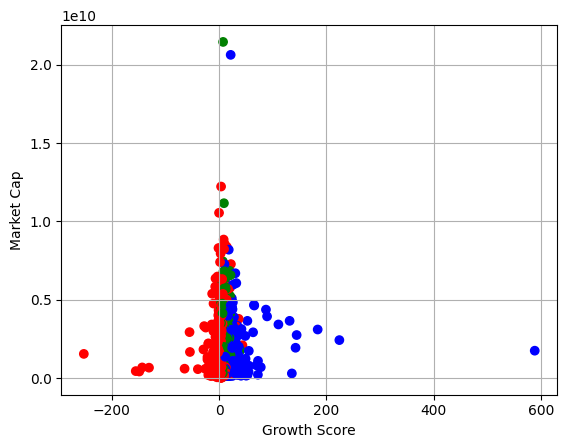

In [208]:
fig, ax = plt.subplots()
colors = {'Value':'red', 'Growth':'blue', 'Blend':'green'}
ax.scatter(data_replaced['Growth Score'], data_replaced['Market Cap LF\n'], 
           c=data_replaced['Style'].apply(lambda x: colors[x]))

plt.xlabel('Growth Score')
plt.ylabel('Market Cap')
plt.grid(True)
plt.show()

In [209]:
#Classify Size
def classify_size(market_cap):
    if market_cap > large_cap_threshold:
        return 'Large'
    elif market_cap > mid_cap_threshold:
        return 'Mid'
    else:
        return 'Small'

In [210]:
large_cap_threshold = 10e09
mid_cap_threshold = 1.5e09

data_replaced['Size'] = data_replaced['Market Cap LF\n'].apply(classify_size)

In [211]:
#Select companies to compare cluster positioning with that of Morningstar rating
selected_companies = data_replaced.iloc[[0, 1, 2, 3, 4]]

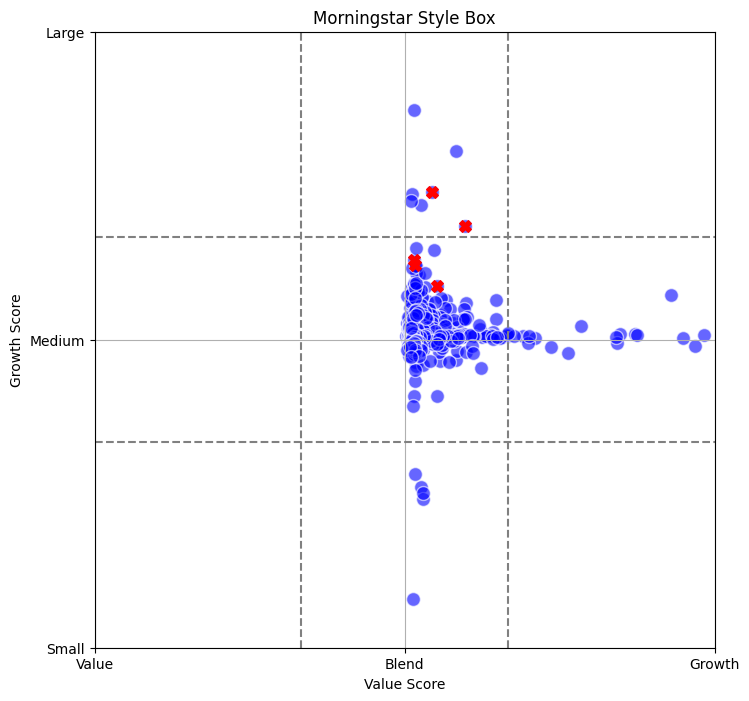

In [212]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data_replaced['Value Score'], data_replaced['Growth Score'], c='blue', alpha=0.6, edgecolors='w', s=100)

ax.scatter(selected_companies['Value Score'], selected_companies['Growth Score'], c='red', marker='X', s=70)

ax.set_xticks([-300, 0, 300])
ax.set_xticklabels(['Value', 'Blend', 'Growth'])
ax.set_yticks([-300, 0, 300])
ax.set_yticklabels(['Small', 'Medium', 'Large'])


plt.xlabel('Value Score')
plt.ylabel('Growth Score')
plt.title('Morningstar Style Box')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.axvline(x=-100, color='grey', linestyle='--')
plt.axvline(x=100, color='grey', linestyle='--')
plt.axhline(y=-100, color='grey', linestyle='--')
plt.axhline(y=100, color='grey', linestyle='--')
plt.grid(True)
plt.show()

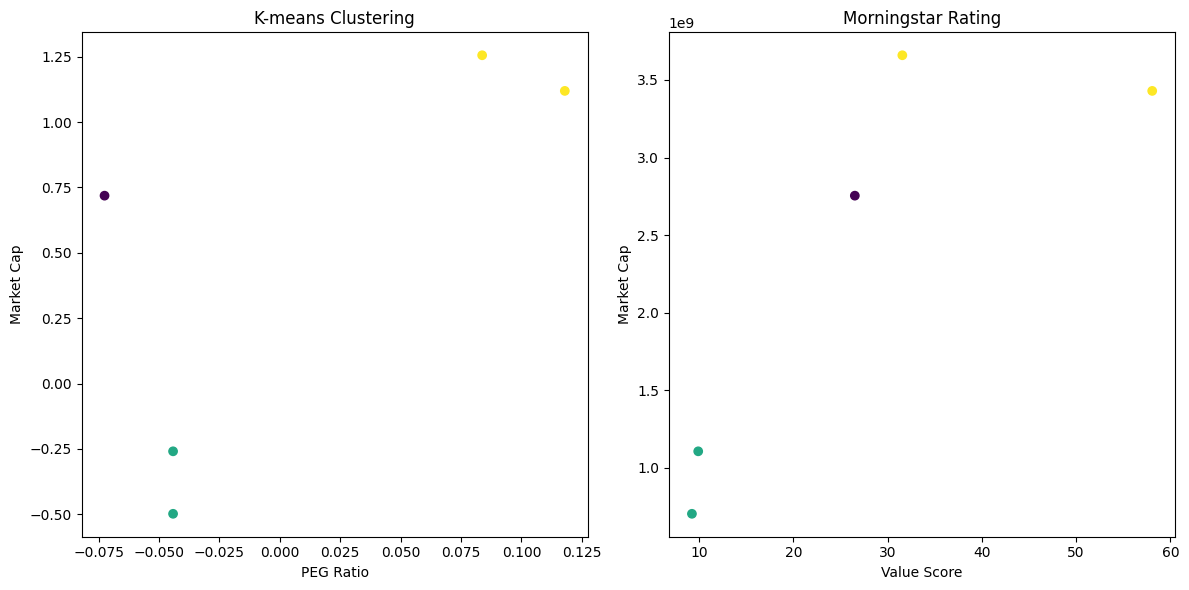

In [213]:
#Compare Cluster positioning of K-means with that of Morningstar ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(df.iloc[:5]['BEst PEG Ratio:Y\n'], df.iloc[:5]['Market Cap LF\n'], c=df.iloc[:5]['Cluster'], cmap='viridis')
ax1.set_xlabel('PEG Ratio')
ax1.set_ylabel('Market Cap')
ax1.set_title('K-means Clustering')

ax2.scatter(data_replaced.iloc[:5]['Value Score'], data_replaced.iloc[:5]['Market Cap LF\n'], c=data_replaced[:5]['Cluster'], cmap='viridis')
ax2.set_xlabel('Value Score')
ax2.set_ylabel('Market Cap')
ax2.set_title('Morningstar Rating')

plt.tight_layout()
plt.show()

In [215]:
#KNN
X = df[['BEst PEG Ratio:Y\n', 'Market Cap LF\n']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test))

k_neighbors = 9 #You can adjust this value

knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN on test set:', accuracy)

1380 592
Accuracy of KNN on test set: 0.9797297297297297


In [216]:
new_stock = [[15, 2.5e9]] #PEG 15 and Market Cap = $2.5 billion

new_stock_scaled = scaler.fit_transform(new_stock)

In [217]:
predicted_cluster = knn.predict(new_stock_scaled)

print(f'The new stock belongs to the cluster: {predicted_cluster[0]}')

The new stock belongs to the cluster: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
